In [2]:
######
# plotTimePoint: plot y = f(x), where y is the difference between the time point when
# each event start to execute during replay and record, and x is the event index
#
#####
import math
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [3]:
def readReplayedTimePoint(file):
    try:
        timePointLines = open(file)
    except:
        print("file not found")
        sys.exit()
    lines = timePointLines.readlines()
    timePointBlocks = []
    j = 0
    while j < len(lines):
        line = lines[j]
        i = j
        if "Line Number" in line:
            timePoints = []
            i = int(line.split("=")[1].strip())
            j += 1
            count = 0
            while count < i-1:
                line = lines[j]
                j += 1
                if "time elapsed from" in line:
                    timePoints.append(int(line.split(":")[1].strip()))
                    count+=1
            timePointBlocks.append(timePoints)
        else:
            j += 1

    # print(timePointBlocks[0])
    return timePointBlocks

In [72]:
def readActualTimePoint(file):
    try:
        timePointLines = open(file)
    except:
        print("file not found")
        sys.exit()
    lines = timePointLines.readlines()
    timePointBlocks = []
    for line in lines:
        timePointBlocks.append(float(line.split(":")[1].strip()))
    return timePointBlocks[1:]

In [18]:
def takeDifference(replay, actual):
    difference = []
    for i, replayTP in enumerate(replay):
        difference.append(replayTP - actual[i])
    return difference

In [6]:
################
# apply linear regression algorithm to the above data set to calculate the slope (p)
################

def getErrorPearson(difference):
    x = []
    for i in range(0, len(difference)):
        x.append(i)
    corr, p_value = pearsonr(x, difference)
    return corr

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x, m_y = np.mean(x), np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return(b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m", marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "g")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

    # function to show plot
    plt.show()

def construct_x(n):
    result = []
    for i in range(0, n):
        result.append(i)
    return result

def linear_regression(y_difference, n):
    # observations 
    x = np.array(construct_x(n))
    y = np.array(y_difference)
#     print(len(x))
#     print(x)
#     print(len(y))
#     print(y)
    # estimating coefficients 
    b = estimate_coef(x, y)
    error = getErrorPearson(y_difference)
    print("Estimated coefficients:\n b_0 = {} \n b_1 = {}".format(b[0], b[1]))
    print("Pearson error: " + str(error))
    # plotting regression line
    plot_regression_line(x, y, b)
    return [b[0], b[1], error]
################################################################

def plot_regression_line_multi(x1, y1, b_a, x2, y2, b_b):
    # plotting the actual points as scatter plot 
    plt.scatter(x1, y1, color = "b", marker = "o", s = 30, label = "before fix") # old
    plt.scatter(x2, y2, color = "r", marker = "o", s = 30, label = "after fix") # new

    # predicted response vector 
    y_pred1 = b_a[0] + b_a[1]*x1
    y_pred2 = b_b[0] + b_b[1]*x2
    
    # plotting the regression line 
    plt.plot(x1, y_pred1, color = "g")
    plt.plot(x2, y_pred2, color = "g")

    # putting labels 
    plt.xlabel('x')
    plt.ylabel('y') 

    # function to show plot
    plt.legend()
    plt.show()
    
def linear_regression_multi(y_difference1, n1, y_difference2, n2):
    # observations
    x1 = np.array(construct_x(n1))
    y1 = np.array(y_difference1)
    
    x2 = np.array(construct_x(n2))
    y2 = np.array(y_difference2)
#     print(len(x))
#     print(x)
#     print(len(y))
#     print(y)
    # estimating coefficients
    b_a = estimate_coef(x1, y1)
    b_b = estimate_coef(x2, y2)
    print("Before fixing: ")
    print("Estimated coefficients:\n b_0_old = {} \n b_1_old = {}".format(b_a[0], b_a[1]))
    print("Pearson error: " + str(getErrorPearson(y_difference1)))
    print("\nAfter fixing: ")
    print("Estimated coefficients:\n b_0_new = {} \n b_1_new = {}".format(b_b[0], b_b[1]))
    print("Pearson error: " + str(getErrorPearson(y_difference2)))
    # plotting regression line 
    plot_regression_line_multi(x1, y1, b_a, x2, y2, b_b)

In [108]:
def plotRecordActualCom(exp_num, set_num):
    replayTimePointsBlock = readReplayedTimePoint("exp%d/set%d/replayTimePointSet%d.txt" % (exp_num, set_num, set_num))
    # print(replayTimePointsBlock[0])
    # print()
    actualTimePoints = readActualTimePoint("exp%d/set%d/actualTimePointSet%d.txt" % (exp_num, set_num, set_num))
    # print(actualTimePoints)
    plt.axis([0, 351, 0, 1.5e7])
    # plt.plot(replayTimePointsBlock[0], 'ro', replayTimePointsBlock[1], 'go', replayTimePointsBlock[2], 'mo', actualTimePoints, 'bo')
    plt.plot(replayTimePointsBlock[0], 'ro', label = "replay")
    plt.plot(actualTimePoints, 'bo', label = "actual")
    plt.legend()
    plt.show()
    
def plotRecordActualDiff(exp_num, set_num, color = 'ro', label = None):
    replayTimePointsBlock = np.array(readReplayedTimePoint("exp%d/set%d/replayTimePointSet%d.txt" % (exp_num, set_num, set_num)))
    actualTimePoints = np.array(readActualTimePoint("exp%d/set%d/actualTimePointSet%d.txt" % (exp_num, set_num, set_num)))
    
#     print(replayTimePointsBlock.shape)
#     print(actualTimePoints.shape)
#     print(replayTimePointsBlock[0])
#     print(actualTimePoints)
    
    num = replayTimePointsBlock.shape[0]
    # take the average difference between the record and 20 replays
    difference = np.zeros(actualTimePoints.shape[0])
    for i in range(num):
        difference += np.array(takeDifference(replayTimePointsBlock[i], actualTimePoints))
    difference /= num
    # print(difference)
    plt.axis([0, 426, 0, 0.6*1e7])
    plt.plot(difference, color, label = label)

# Exp5

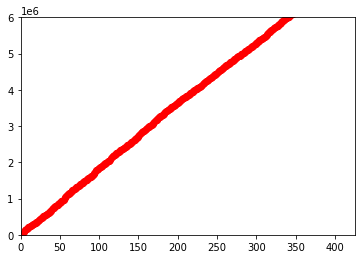

In [37]:
plotRecordActualDiff(5, 1)

# Exp7

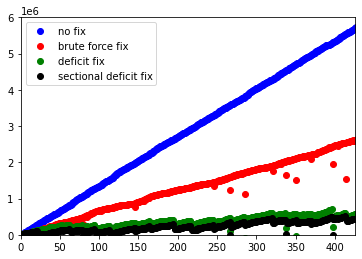

In [120]:
plotRecordActualDiff(7, 2, color = 'bo', label = "no fix")
plotRecordActualDiff(7, 1, color = 'ro', label = "brute force fix")
plotRecordActualDiff(7, 3, color = 'go', label = "deficit fix")
# plotRecordActualDiff(7, 3, color = 'go', label = "deficit fix")
plotRecordActualDiff(7, 4, color = 'ko', label = "sectional deficit fix")

plt.legend()
plt.show()

## Set2 - no fix

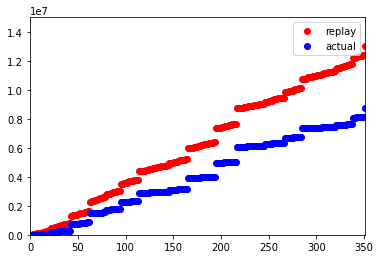

In [81]:
plotRecordActualCom(exp_num = 7, set_num = 2)

## Set1 - brute force fix

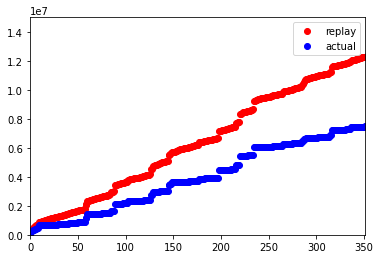

In [82]:
plotRecordActualCom(exp_num = 7, set_num = 1)

## Set3 - deficit fix

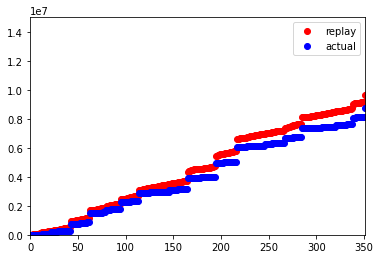

In [83]:
plotRecordActualCom(exp_num = 7, set_num = 3)

## Set4  - sectional deficit fix

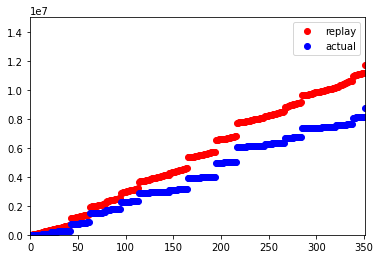

In [84]:
plotRecordActualCom(exp_num = 7, set_num = 4)

# Exp8

In [42]:
plotRecordActualDiff(8, 1, color = 'bo', label = "no fix")
plotRecordActualDiff(8, 2, color = 'ro', label = "extreme deficit")
plotRecordActualDiff(8, 3, color = 'go', label = "normal deficit")
plotRecordActualDiff(8, 4, color = 'ko', label = "extreme brute force")
plotRecordActualDiff(8, 5, color = 'yo', label = "extreme deficit with check of timepoint")
plt.legend()
plt.show()

(20, 425)
(426,)
[       0      762    29920    30645    39999    40703    50322    66135
    79993    95924   109980   119838   130160   149859   160578   180093
   182407   199875   219789   220252   239831   249780   260204   269826
   289827   299846   319833   329859   331445   349817   350504   449696
   451357   456530   470028   480044   510222   529857   540608   550335
   580249   582802   600005   610731   620067   630130   649877   660055
   680686   691920   960485   979873  1010476  1040485  1069846  1109940
  1150049  1171929  1182203  1200030  1209997  1220506  1237435  1240034
  1252258  1259991  1270192  1287658  1310192  1320199  1329872  1336959
  1340141  1352162  1369860  1371966  1387713  1389952  1887777  1891561
  1900678  1910368  1921198  1935388  1942086  1951251  1971360  1990069
  1999956  2012938  2022949  2030114  2050000  2059915  2065721  2126726
  2130650  2145255  2160093  2162490  2180646  2190218  2205200  2221298
  2243308  2259924  2283559  23017

ValueError: operands could not be broadcast together with shapes (426,) (425,) (426,) 

# Pearson error test
Test how close the RecordActualDiff scattered plot is to a linear line

Estimated coefficients:
 b_0 = -1617.9214302205946 
 b_1 = 6529.305877152985
Pearson error: 0.9974287981831693


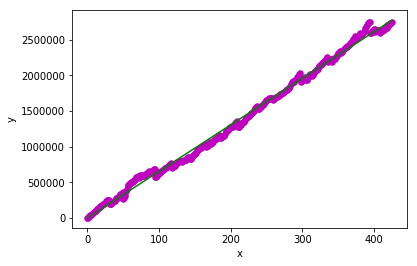

[-1617.9214302205946, 6529.305877152985, 0.9974287981831693]

In [9]:
# y = np.array(difference)
linear_regression(difference, len(difference))

Before fixing: 
Estimated coefficients:
 b_0_old = -1617.9214302205946 
 b_1_old = 6529.305877152985
Pearson error: 0.9974287981831693

After fixing: 
Estimated coefficients:
 b_0_new = 107445.32691229315 
 b_1_new = 2453.7998534699045
Pearson error: 0.9746624375700157


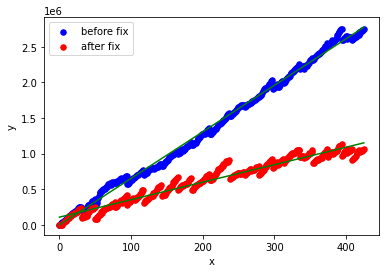

In [101]:
def plotFixComWithLR(exp_num_before, set_num_before, exp_num_after, set_num_after):
    replayTimePointsBlock = readReplayedTimePoint("exp%d/set%d/replayTimePointSet%d.txt" % (exp_num_before, set_num_before, set_num_before))
    actualTimePoints = readActualTimePoint("exp%d/set%d/actualTimePointSet%d.txt" % (exp_num_before, set_num_before, set_num_before))
    difference = takeDifference(replayTimePointsBlock[0], actualTimePoints)

    replayTimePointsBlock = readReplayedTimePoint("exp%d/set%d/replayTimePointSet%d.txt" % (exp_num_after, set_num_after, set_num_after))
    actualTimePoints = readActualTimePoint("exp%d/set%d/actualTimePointSet%d.txt" % (exp_num_after, set_num_after, set_num_after))
    difference_exp = takeDifference(replayTimePointsBlock[0], actualTimePoints)

    linear_regression_multi(difference, len(difference), difference_exp, len(difference_exp))
plotFixComWithLR(8, 1, 8, 2)

Before fixing: 
Estimated coefficients:
 b_0_old = -1617.9214302205946 
 b_1_old = 6529.305877152985
Pearson error: 0.9974287981831693

After fixing: 
Estimated coefficients:
 b_0_new = 50387.21558861388 
 b_1_new = 11801.348181819945
Pearson error: 0.9996213372816297


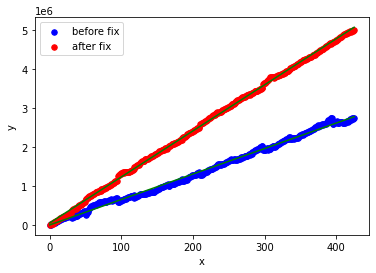

In [102]:
plotFixComWithLR(8, 1, 8, 5)

Before fixing: 
Estimated coefficients:
 b_0_old = -1617.9214302205946 
 b_1_old = 6529.305877152985
Pearson error: 0.9974287981831693

After fixing: 
Estimated coefficients:
 b_0_new = 146083.86384976562 
 b_1_new = 9948.273371996685
Pearson error: 0.9990629120930995


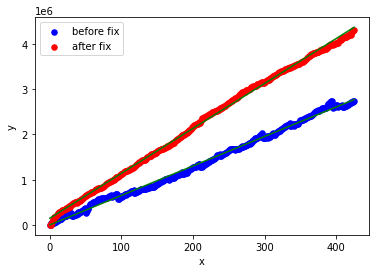

In [103]:
plotFixComWithLR(8, 1, 8, 4)

Estimated coefficients:
 b_0 = 29054.771670190283 
 b_1 = 6218.492600422833
Pearson error: 0.9480479307191665


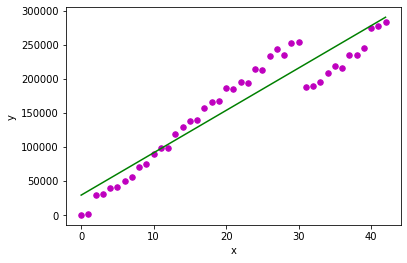

Estimated coefficients:
 b_0 = 300430.2621564482 
 b_1 = 8975.295379039566
Pearson error: 0.9533891575934986


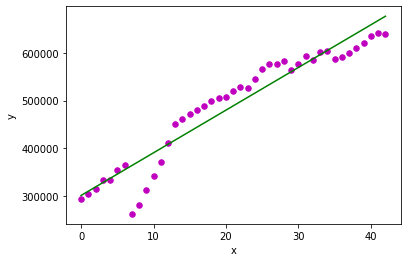

Estimated coefficients:
 b_0 = 608900.9630021141 
 b_1 = 3840.3649954696466
Pearson error: 0.8329994317840976


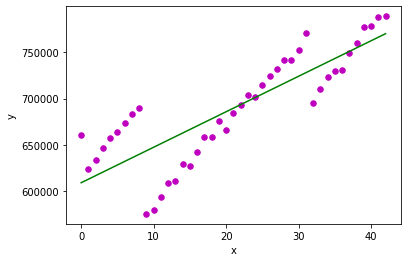

Estimated coefficients:
 b_0 = 763635.5348837209 
 b_1 = 6993.365448504984
Pearson error: 0.9804352400207198


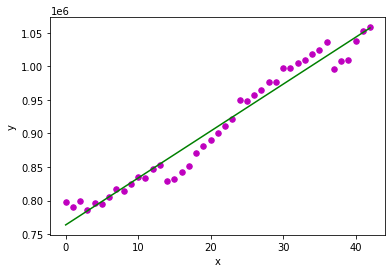

Estimated coefficients:
 b_0 = 1051276.7885835103 
 b_1 = 7044.160676532733
Pearson error: 0.9620068314801996


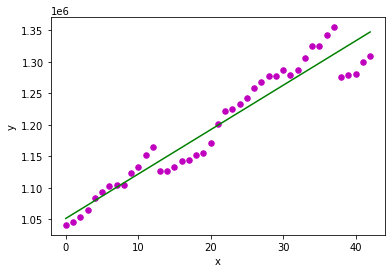

Estimated coefficients:
 b_0 = 1339899.5232558139 
 b_1 = 8608.892026578073
Pearson error: 0.9905650357292459


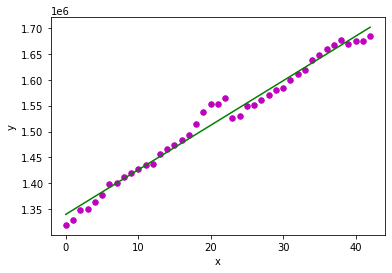

Estimated coefficients:
 b_0 = 1644179.7515856237 
 b_1 = 8459.655240108728
Pearson error: 0.9660187977210205


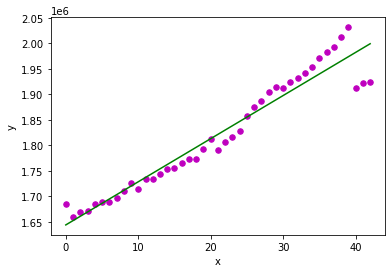

Estimated coefficients:
 b_0 = 1924516.1004228329 
 b_1 = 8155.007399577167
Pearson error: 0.9700678148849746


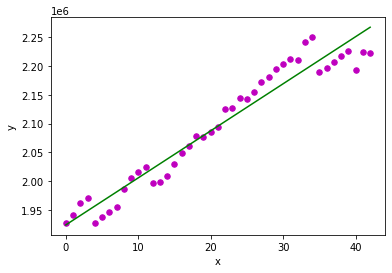

Estimated coefficients:
 b_0 = 2238815.395348837 
 b_1 = 9116.036544850498
Pearson error: 0.9932774104778624


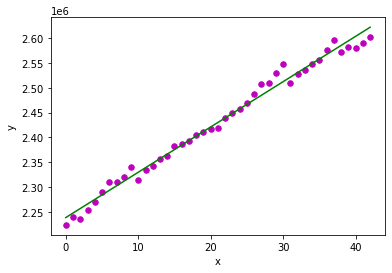

Estimated coefficients:
 b_0 = 2644411.880769231 
 b_1 = 865.3827935222672
Pearson error: 0.20315645885841715


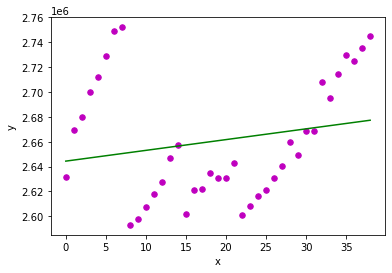

0.8799964109269205
mean Error: 0.8799964109269205
mean p: 6827.665310460649


In [107]:
# exp: study the split errors: split data into several sections, apply linear regression to each of the sections,
# and find the errors of them
x = len(difference)
i = 0
error = []
ps = []
while i < x:
    # get the sublist
    subDifference = difference[i : i + math.ceil(x/10)]

    # update index
    i += math.ceil(x/10)
    
    result = linear_regression(subDifference, len(subDifference))
    
    ps.append(result[1])
    error.append(result[2])

e = np.mean(error)
p = np.mean(ps)
print(e)
print("mean Error: " + str(e))
print("mean p: " + str(p))